# Lesson Overview
Welcome to our final lesson in this course, Explorer! In this lesson, we will delve into the concept and calculation of Volume Weighted Average Price (VWAP) specifically for Tesla ($TSLA) stock data using Pandas. VWAP is a crucial indicator in trading that helps by providing the average price a security has traded at during the day, weighted by volume. By the end of this lesson, you'll be able to calculate VWAP and visualize it alongside the closing prices of Tesla stock data.

## Introduction to VWAP
Volume Weighted Average Price (VWAP) is a trading benchmark that gives traders insight into both the price and volume of trades for a particular stock. It represents the average price a stock has traded at throughout the day, weighted by volume.

VWAP is used by traders to identify the average price at which a stock was traded over a given period, reflecting both the price and the traded volume. It helps in determining the efficiency of stock execution by comparing it against the market's average.

The VWAP is calculated using the cumulative sum (the running total) of the volume and the volume-weighted prices:

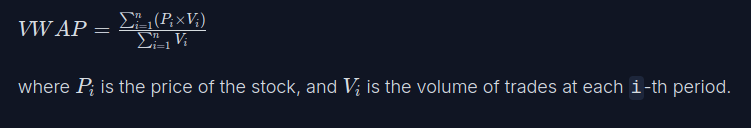

## Loading and Preprocessing Tesla Stock Data
Let's start by importing the necessary libraries and loading the Tesla ($TSLA) stock data. We'll use the load_dataset function from the datasets library.

```Python
Copy
Play
import pandas as pd
import numpy as np
from datasets import load_dataset

# Load Tesla dataset
dataset = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(dataset['train'])
```
Next, we'll preprocess the data by converting the 'Date' column to datetime format and setting it as the index.

```Python
Copy
Play
# Convert Date column to datetime format and set as index
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df.set_index('Date', inplace=True)
```
For better visualization, we'll filter the data to focus on the year 2018.

```Python
Copy
Play
# Filter data for the year 2018
tesla_df_small = tesla_df.loc['2018'].copy()
```
## Calculating the VWAP
Now that we have our data preprocessed, we can calculate the VWAP. We'll use the cumulative sum (the running total, where each value is added to the sum of previous values) of the product of volume and close price and then divide it by the cumulative sum of the volume.

```Python
Copy
Play
# Calculate VWAP
tesla_df_small['VWAP'] = (np.cumsum(tesla_df_small['Volume'] * tesla_df_small['Close']) / 
                          np.cumsum(tesla_df_small['Volume']))
```
Visualizing VWAP with Closing Prices
Visualization helps in interpreting the financial data more effectively. We'll use Matplotlib to plot the VWAP alongside the closing prices.

```Python
Copy
Play
import matplotlib.pyplot as plt

# Visualize VWAP with Close Price
tesla_df_small[['Close', 'VWAP']].plot(figsize=(12, 6), title="TSLA Close Price and VWAP (2018)")
plt.show()
```
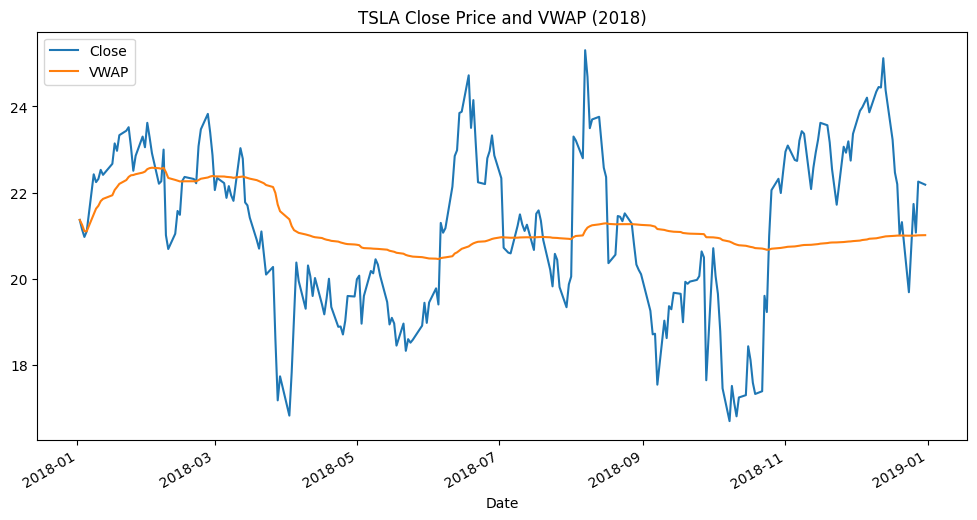

The output of the above code will be a plot that visually compares the closing prices and the VWAP of the Tesla stock during the year 2018. This plot helps in understanding the relationship between the price movements and the volume-weighted average price, giving insights into potential buying or selling pressures.

This visualization provides a clear comparison between the VWAP and the closing prices over the year 2018, helping traders identify trends and make more informed trading decisions.

## Lesson Summary
In this lesson, you learned how to calculate and visualize the Volume Weighted Average Price (VWAP) for Tesla stock data using Pandas. We covered the importance of VWAP, loaded and preprocessed the data, performed the VWAP calculation, and created a visualization.

Practice these steps on different date ranges or with different stocks to solidify your understanding. Mastering these techniques will enhance your ability to analyze financial data and make effective trading decisions based on volume-weighted trends. Keep practicing!



## Filter Data for the First Half of 2018

Certainly, let's modify the code to calculate the VWAP (Volume Weighted Average Price) using a `for` loop instead of `np.cumsum`. Here's how you can do it:

```python
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Tesla dataset
dataset = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(dataset['train'])

# Convert Date column to datetime format and set as index
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df.set_index('Date', inplace=True)

# Filter data for the year 2018
tesla_df_small = tesla_df.loc['2018'].copy()

# Calculate VWAP using a for loop
vwap_values = []
price_volume_sum = 0
volume_sum = 0

for idx, row in tesla_df_small.iterrows():
    price_volume_sum += row['Close'] * row['Volume']
    volume_sum += row['Volume']
    vwap_values.append(price_volume_sum / volume_sum)

tesla_df_small['VWAP'] = vwap_values

# Visualize VWAP with Close Price
tesla_df_small[['Close', 'VWAP']].plot(figsize=(12, 6), title="TSLA Close Price and VWAP (2018)")
plt.show()
```

### 🚀 Explanation of the Changes:
1. **For Loop Calculation**:
   - A for loop iterates over each row in the `tesla_df_small` DataFrame.
   - For each row, it calculates the cumulative sum of the product of `Close` price and `Volume`.
   - Simultaneously, it sums the `Volume`.
   - The VWAP is then calculated by dividing the cumulative `price_volume_sum` by `volume_sum` for each row.

2. **Storing VWAP**:
   - The calculated VWAP values are stored in a list, `vwap_values`, which is then assigned to the `tesla_df_small['VWAP']` column.

3. **Plotting**:
   - The VWAP is plotted alongside the `Close` price for 2018, just as before.

### 🌟 Conclusion:
By using a for loop, you gain more control over the VWAP calculation process, which is especially useful for understanding how cumulative operations work in financial data preprocessing. Great work on handling this adjustment, Explorer!

## Debug and Fix the VWAP Calculation

The bug in the code lies in the calculation of VWAP. The current formula incorrectly adds `Volume` to `Close` prices instead of multiplying them. The correct calculation should multiply the `Close` price by the `Volume` for each day and then compute the cumulative sum.

Here's the corrected version of the code:

```python
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Tesla dataset
dataset = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(dataset['train'])

# Convert Date column to datetime format and set as index
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df.set_index('Date', inplace=True)

# Filter data for the year 2018
tesla_df_small = tesla_df.loc['2018'].copy()

# Calculate VWAP
tesla_df_small['VWAP'] = (np.cumsum(tesla_df_small['Close'] * tesla_df_small['Volume']) / 
                          np.cumsum(tesla_df_small['Volume']))

# Visualize VWAP with Close Price
tesla_df_small[['Close', 'VWAP']].plot(figsize=(12, 6), title="TSLA Close Price and VWAP (2018)")
plt.show()
```

### Explanation of the Fix:
- **Incorrect Operation**: The original code added `Volume` to `Close` price, which is incorrect.
- **Corrected Operation**: The correct operation multiplies `Close` price by `Volume` to calculate the total value traded for each day. This product is then summed cumulatively and divided by the cumulative `Volume` to get the VWAP.

By fixing the multiplication instead of addition, the VWAP calculation is now correct, and the plot will accurately reflect the VWAP along with the closing prices for Tesla stock in 2018.

Calculate and Visualize VWAP for Tesla Stock